In [1]:
import pandas as pd     # Se carga la Libreria de pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import requests

In [172]:
df_homicidios= pd.read_excel('data/homicidios.xlsx', sheet_name=None)

In [173]:
df_homicidios.keys()

dict_keys(['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas'])

In [174]:
df_hechos_homicidios= df_homicidios['HECHOS']
df_victimas_homicidios= df_homicidios['VICTIMAS']

In [175]:
df_hechos_homicidios.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Se cuentas los valores nulos de las columnas y se puede ser que Altura tiene 567 datos nulos y Cruce tiene 171 datos nulos. Analizando los primeros registros del dataset, se puede ver que 'Cruce' tiene los mismos valores que las 'direccion normalizada' y 'lugar_del_hecho' por lo tanto se eliminara 'Cruce', 'direccion normalizada'. La columna altura no es relevante para este analisis por lo tanto tambien se eliminara.

In [176]:
df_hechos_homicidios= df_hechos_homicidios.drop(['Dirección Normalizada','Altura','Cruce'], axis=1) # Eliminar columnas innecesarias

In [177]:
df_hechos_homicidios[df_hechos_homicidios['Calle'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se visualiza la unica fila de la columna 'calle' que es nulo y se puede ver que no tienes datos de direccion ni posicion, por lo tanto se eliminara

In [178]:
df_hechos_homicidios= df_hechos_homicidios.dropna(subset=['Calle']) # Elimina filas con app_name nulo

In [179]:
df_hechos_homicidios.duplicated().sum()     # Se cuentan las filas duplicadas

0

In [180]:
df_hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               695 non-null    object        
 1   N_VICTIMAS       695 non-null    int64         
 2   FECHA            695 non-null    datetime64[ns]
 3   AAAA             695 non-null    int64         
 4   MM               695 non-null    int64         
 5   DD               695 non-null    int64         
 6   HORA             695 non-null    object        
 7   HH               695 non-null    object        
 8   LUGAR_DEL_HECHO  695 non-null    object        
 9   TIPO_DE_CALLE    695 non-null    object        
 10  Calle            695 non-null    object        
 11  COMUNA           695 non-null    int64         
 12  XY (CABA)        695 non-null    object        
 13  pos x            695 non-null    object        
 14  pos y            695 non-null    object        

In [181]:
df_hechos_homicidios['pos x'].value_counts() # Contar los valores

pos x
.               11
-58.44451316     5
-58.50073810     4
-58.46743471     4
-58.50877521     4
                ..
-58.39100580     1
-58.37697717     1
-58.45807401     1
-58.42023854     1
-58.37976155     1
Name: count, Length: 605, dtype: int64

Haciendo un conteo de valores se puede observar que tiene 11 valores con "." por lo tanto procederemos a eliminar estos registros

In [182]:
df_hechos_homicidios= df_hechos_homicidios[df_hechos_homicidios['pos x'] != '.']

C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_20652\37181635.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 30)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_20652\37181635.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 30)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_20652\37181635.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 30)


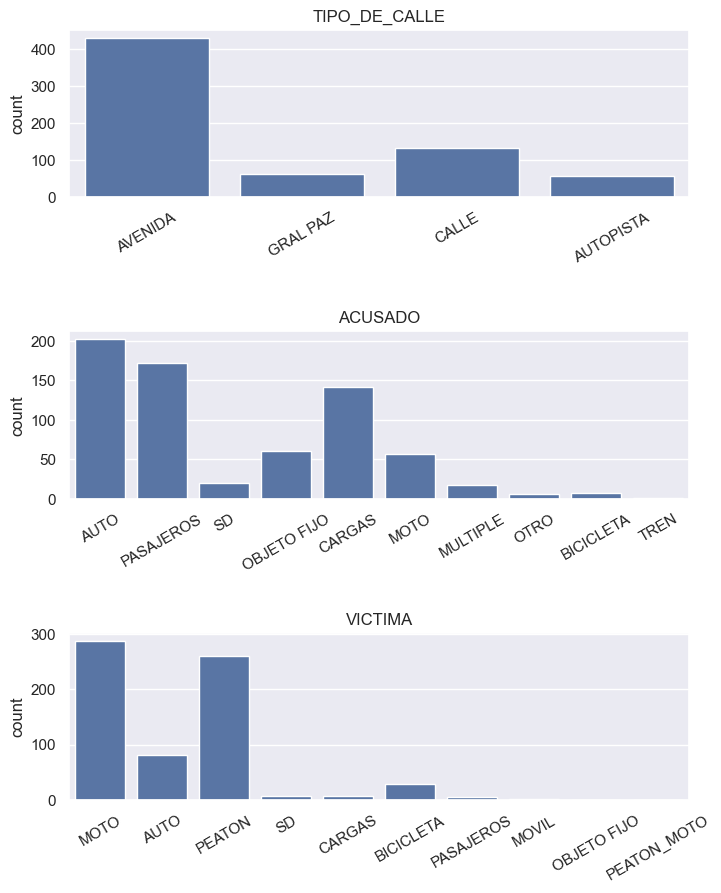

In [183]:
columnas= ['TIPO_DE_CALLE', 'ACUSADO', 'VICTIMA']
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize= (8,10))
fig.subplots_adjust(hspace= 0.8)
for i, col in enumerate(columnas):
    sns.countplot(data=df_hechos_homicidios, x= col, ax= ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 30)
    

Se puede Observar que no hay valores que sean iguales pero que se diferencien por tener letras mayusculas o minusculas. Tambien se pueden ser valore con "SD" lo cual significa que no tiene datos de ese registro

In [184]:
df_hechos_homicidios = df_hechos_homicidios.rename(columns={'pos x': 'longitud', 'pos y':'latitud'}) # cambiar de nombre las clumnas pos x, pos y

In [185]:
df_hechos_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [186]:
df_victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


El dataset de victimas 717 registros y ningun valor nulo

In [187]:
df_victimas_homicidios.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_20652\3974099044.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 25)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_20652\3974099044.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 25)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_20652\3974099044.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 25)


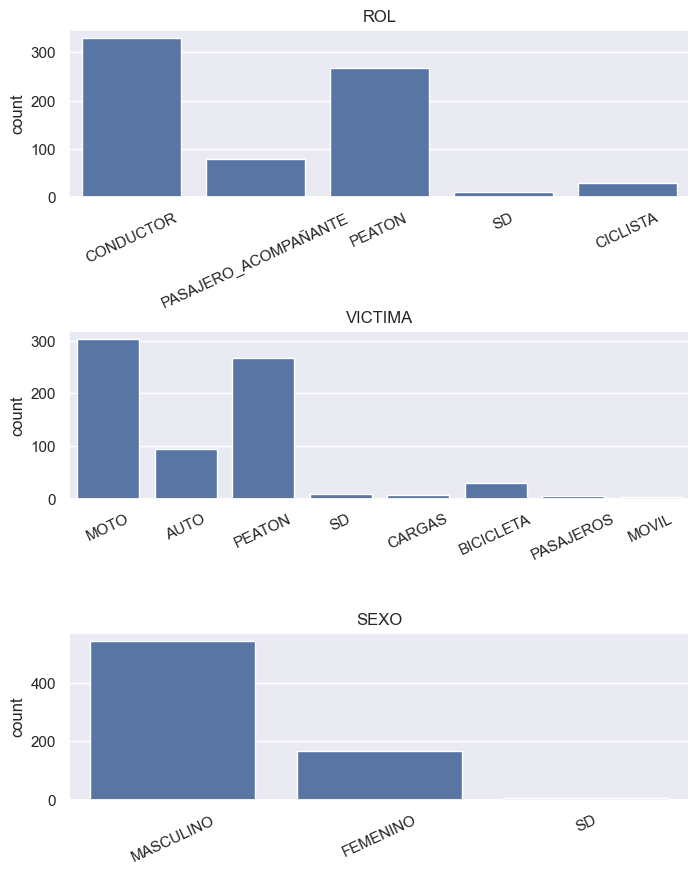

In [188]:
columnas= ['ROL', 'VICTIMA', 'SEXO']
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize= (8,10))
fig.subplots_adjust(hspace= 0.8)
for i, col in enumerate(columnas):
    sns.countplot(data=df_victimas_homicidios, x= col, ax= ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 25)

Se puede observar que no hay valores que sean iguales pero que se diferencien por tener letras mayusculas o minusculas. Se puede apreciar que tambien hay varios valores "SD" lo cual significa que no hay datos

In [189]:
df_victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [190]:
Promedio_edad_M= round(df_victimas_homicidios[(df_victimas_homicidios['SEXO'] == 'MASCULINO') & (df_victimas_homicidios['EDAD'] != 'SD')]['EDAD'].mean())
print(Promedio_edad_M)
Promedio_edad_F= round(df_victimas_homicidios[(df_victimas_homicidios['SEXO'] == 'FEMENINO') & (df_victimas_homicidios['EDAD'] != 'SD')]['EDAD'].mean())
print(Promedio_edad_F)

40
51


In [191]:
df_victimas_homicidios.loc[(df_victimas_homicidios['SEXO'] == 'MASCULINO') & (df_victimas_homicidios['EDAD'] == 'SD'),'EDAD'] = Promedio_edad_M
df_victimas_homicidios.loc[(df_victimas_homicidios['SEXO'] == 'FEMENINO') & (df_victimas_homicidios['EDAD'] == 'SD'),'EDAD'] = Promedio_edad_F

In [192]:
df_victimas_homicidios= df_victimas_homicidios[df_victimas_homicidios['EDAD'] != 'SD']      # Se Omiten los registros con edad sin datos

In [193]:
df_victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             711 non-null    object        
 1   FECHA                711 non-null    datetime64[ns]
 2   AAAA                 711 non-null    int64         
 3   MM                   711 non-null    int64         
 4   DD                   711 non-null    int64         
 5   ROL                  711 non-null    object        
 6   VICTIMA              711 non-null    object        
 7   SEXO                 711 non-null    object        
 8   EDAD                 711 non-null    object        
 9   FECHA_FALLECIMIENTO  711 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 61.1+ KB


In [198]:
#df_hechos_homicidios

################################################################################################################################

Obtener datos de la API "api-transporte.buenosaires.gob.ar"

In [20]:
url = 'https://apitransporte.buenosaires.gob.ar/transito/v1/semaforos?'
client_id = '01929d26b24941418358b80dd3ef7560'
client_secret = '8c1CcaDdEF0142B09AEaDD63D2a7068E'

parametros = {    
    'client_id': client_id,
    'client_secret': client_secret
}

In [23]:
respuesta = requests.get(url, params=parametros)

In [34]:
if respuesta.status_code == 200:
    datos = respuesta.json()['list']
df= pd.DataFrame(datos)

In [35]:
df

,provider,type,code,name,status,latitude,longitude
0,UTC API,Cruce Citar,3337,3337,Conectado,-34.576578,-58.431704
1,UTC API,Cruce Citar,3338,3338,Conectado,-34.583724,-58.423080
2,UTC API,Cruce Citar,3339,3339,Conectado,-34.577002,-58.430329
3,UTC API,Cruce Icarus,CLT#040317,Av. Córdoba - Fitz Roy,Conectado,-34.587578,-58.440181
4,UTC API,Cruce Icarus,CLT#040316,Av. Córdoba - Humbolt,Conectado,-34.588099,-58.439413
...,...,...,...,...,...,...,...
3136,UTC API,Cruce Icarus,CLT#060836,Av. Juan B. Alberdi - Carhué,Conectado,-34.659017,-58.512317
3137,UTC API,Cruce Sitra,ef7f6550-fef3-4c2a-b480-e9fad9b975c2,8609,Desconocido,-34.636992,-58.398477
3138,UTC API,Cruce Icarus,CLT#060830,Av. Juan B. Alberdi - Cafayate,Conectado,-34.655040,-58.506506
3139,UTC API,Cruce Icarus,CLT#080420,Av. San Martín - Av. Donato Álvarez - Dickman,Error de conexión,-34.602886,-58.464888
